In [1]:
!pip install pandas 
!pip install numpy
!pip install scikit-learn==0.24.1
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sb
import joblib

In [3]:
data = pd.read_csv('sample_data/Q1.csv')
data.head()

,Timestamp,CHP1Temp1(Deg C),CHP1Temp2(Deg C),CHP2Temp1(Deg C),CHP2Temp2(Deg C),CHP1Vib1(mm/s),CHP1Vib2(mm/s),CHP2Vib1(mm/s),CHP2Vib2(mm/s),Fault
0,3/10/2018 0:00,39.370909,38.637728,40.846605,39.782834,0.060756,0.066139,0.087974,0.097370,0
1,3/10/2018 0:00,39.390616,38.651286,40.884015,39.805669,0.070343,0.064768,0.094204,0.111891,0
2,3/10/2018 0:00,39.403041,38.659552,40.926061,39.817418,0.053073,0.053162,0.085925,0.088741,0
3,3/10/2018 0:00,39.420096,38.677405,40.966947,39.839593,0.059945,0.061724,0.088830,0.100587,0
4,3/10/2018 0:00,39.430529,38.678065,41.008001,39.849687,0.072104,0.060607,0.089137,0.106438,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13847 entries, 0 to 13846
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         13847 non-null  object 
 1   CHP1Temp1(Deg C)  13847 non-null  float64
 2   CHP1Temp2(Deg C)  13847 non-null  float64
 3   CHP2Temp1(Deg C)  13847 non-null  float64
 4   CHP2Temp2(Deg C)  13847 non-null  float64
 5   CHP1Vib1(mm/s)    13847 non-null  float64
 6   CHP1Vib2(mm/s)    13847 non-null  float64
 7   CHP2Vib1(mm/s)    13847 non-null  float64
 8   CHP2Vib2(mm/s)    13847 non-null  float64
 9   Fault             13847 non-null  int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 1.1+ MB


Melihat informasi awal data dan mengecek apakah ada ketimpangan jumlah data non-null (indikasi ada data null). Terlihat bahwa semuanya memiliki nilai non-null yang sama berarti tidak ada missing data 

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CHP1Temp1(Deg C),13847.0,38.894831,1.657766,34.272883,38.336334,39.569812,39.970923,41.325293
CHP1Temp2(Deg C),13847.0,38.372753,1.818556,33.652465,37.233618,39.364623,39.671286,40.638881
CHP2Temp1(Deg C),13847.0,37.049863,2.927990,31.602933,35.394773,38.227170,39.413810,43.187444
CHP2Temp2(Deg C),13847.0,37.083295,3.476318,31.247236,34.523069,37.395959,40.465354,41.962697
CHP1Vib1(mm/s),13847.0,0.998612,0.616521,0.046510,0.070278,1.322656,1.473305,1.610700
CHP1Vib2(mm/s),13847.0,1.345662,0.853053,0.045864,0.067707,1.778066,1.967611,2.390570
CHP2Vib1(mm/s),13847.0,0.934057,0.619965,0.068607,0.091273,0.935697,1.525421,1.785126
CHP2Vib2(mm/s),13847.0,1.763645,1.268073,0.082864,0.108075,1.670248,2.952790,3.950299
Fault,13847.0,0.393082,0.488452,0.000000,0.000000,0.000000,1.000000,1.000000


Meninjau statistik dari data. Dilihat dari standard deviasi, data yang paling seragam adalah CHP1Vib1 sedangkan paling terdispersi adalah CHP2Temp2.   

Text(0.5, 1.0, 'Correlation Plot Training Data')

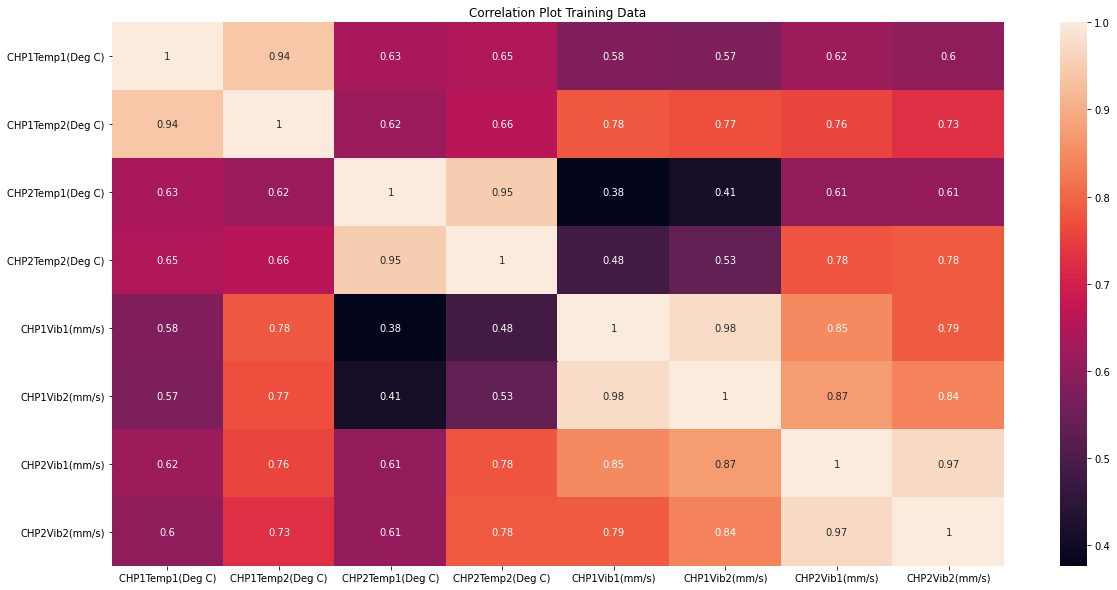

In [6]:
fig,ax = plt.subplots(figsize=(20,10))
sb.heatmap(data.loc[:,data.columns != "Fault" ].corr(),ax=ax,annot=True)
ax.set_title("Correlation Plot Training Data")

Terlihat dari plot, semua atribut menunjukkan korelasi positif dengan nilai yang berbeda-beda. Yang tertinggi antara CHP1Vib1 dengan CHP1Vib2 sedangkan yang terkecil antara CHP2Temp1 dengan CHP1Vib1.   

In [7]:
data.columns.values

array(['Timestamp', 'CHP1Temp1(Deg C)', 'CHP1Temp2(Deg C)',
       'CHP2Temp1(Deg C)', 'CHP2Temp2(Deg C)', 'CHP1Vib1(mm/s)',
       'CHP1Vib2(mm/s)', 'CHP2Vib1(mm/s)', 'CHP2Vib2(mm/s)', 'Fault'],
      dtype=object)

In [8]:
data_numeric = data.copy().drop(['Timestamp','Fault'],1)

Text(0.5, 1.0, 'Box-Plot Training Data')

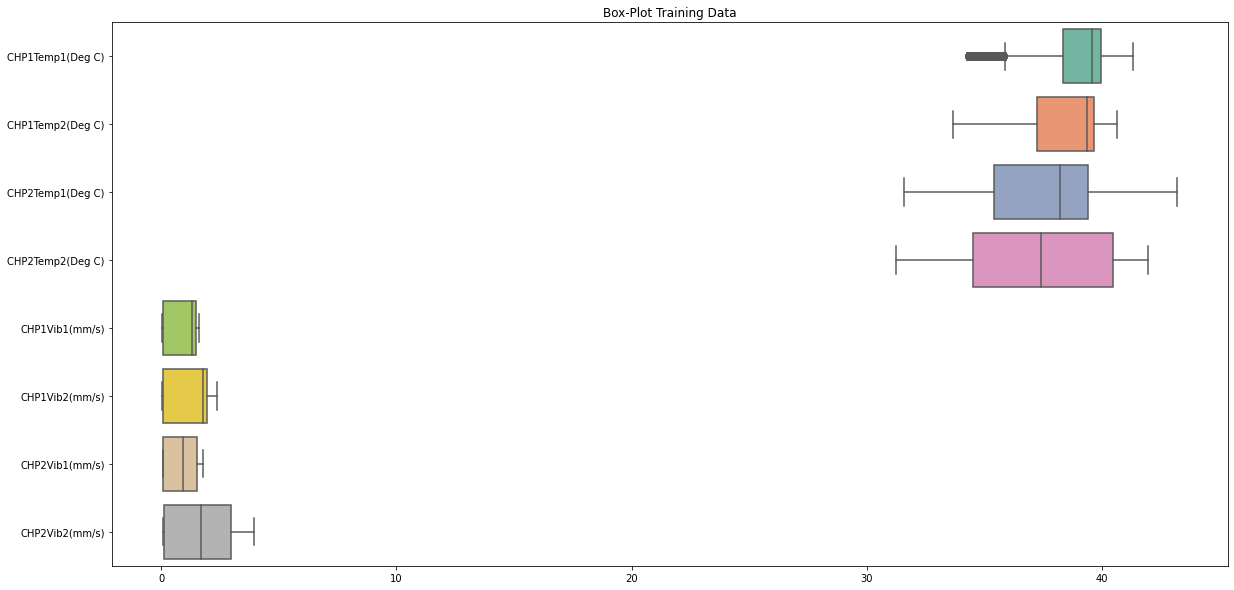

In [9]:
fig1,ax1 = plt.subplots(figsize=(20,10))
ax1 = sb.boxplot(data=data_numeric, orient="h", palette="Set2")
ax1.set_title("Box-Plot Training Data")

Pada boxplot, terlihat banyak outliers (extreme-low) pada CHP1Temp1(Deg C). Hal ini bisa berpengaruh pada proses learning model. Hal ini mungkin perlu investigasi lebih lanjut untuk penanganan kedepannya. Sedangkan atribut lain, ada yang berupa normal distribution dan skewed. Untuk skewed, bisa diterapkan transformation untuk membuat distribusinya mendekati normal/bell-shaped.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


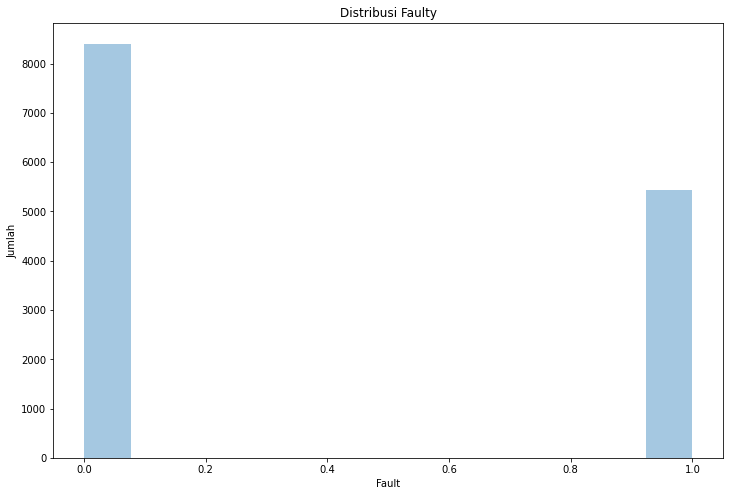

In [10]:
plt.figure(figsize=(12,8))
plt.title("Distribusi Faulty")
plt.ylabel('Jumlah')
sb.distplot(data['Fault'],kde=False);

Terdapat perbedaan kelas antara Fault (1) dengan Normal (0). Hal ini akan berpengaruh terhadap learning dari model yang digunakan. Hal ini bisa diatasi dengan pembagian stratifikasi saat train/train split atau parameter class_weight pada algoritma ML seperti Random Forest 

In [11]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV,RandomizedSearchCV,cross_val_score,cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,make_scorer, mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_score,recall_score,roc_auc_score,roc_curve, plot_confusion_matrix
from math import sqrt
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from typing import List

def split_training_stratified(data_train:object,target_column:str,
                              test_size:float=0.2,splits:int=1)->List[object]:
    """
    Menyamaratakan distribusi data pada subset terkait dan dipisah sesuai dengan porsi yang telah ditentukan
    
    Parameters:
        data_train      : Data (atribut) untuk training
        target_column   : Atribut yang diprediksi pada data_train
        test_size       : Porsi subset data untuk test hasil training
        splits          : Pembagian subset/batch data training oleh algoritma stratified-split scikit-learn
    Output:
        X_train [List]  : Subset data training
        y_train [List]  : Target value untuk data training
        X_test  [List]  : Subset data testing
        y_test  [List]  : Target value untuk data testing
    """
    df_train = data_train.copy()
    X = df_train.drop(target_column,axis=1)
    y = df_train[target_column]
    Split = StratifiedShuffleSplit(n_splits=splits, test_size=test_size)
    for train_index, test_index in Split.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    return X_train,X_test,y_train,y_test

def split_training(data_train:object,target_column:str,test_size:float=0.2,shuffle:bool=True)->List[object]:
    """
    Memisahkan data training (tanpa proses stratifikasi) sesuai dengan porsi yang ditentukan.
    
    Parameters:
        data_train      : Data (atribut) untuk training
        target_column   : Atribut yang diprediksi pada data_train
        test_size       : Porsi subset data untuk test hasil training
        shuffle         : Pengacakan data training untuk meminimalkan bias
    Output:
        X_train [List]  : Subset data training
        y_train [List]  : Target value untuk data training
        X_test  [List]  : Subset data testing
        y_test  [List]  : Target value untuk data testing
    """
    df_train2 = data_train.copy().sample(frac=1)
    X = df_train2.drop(target_column,axis=1)
    y = df_train2[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101, shuffle=shuffle)
    return X_train, X_test, y_train, y_test

def normalize(data_train:object,data_test:object,
              types:str="MinMax")->object:
    """
    Penyamarataan nilai atribute dalam rentang/skala yang sama. 
    
    Parameters:
        data_train      : Data (atribut) untuk training
        data_test       : Data (atribut) untuk testing
        types           : Tipe normalisasi (Minmax, Standard, Robust)
    Output:
        scaled_train [object]  : Data train yang telah dinormalisasi
        scaled_test  [object]  : Data test yang telah dinormalisasi
        scaler       [object]  : Scaling variable dengan catatan skala data terkait
    """
    scaler = None
    if types == "Standard":
        scaler = StandardScaler()
    elif types == "Robust":
        scaler = RobustScaler()
    else:
        scaler = MinMaxScaler()
    scaler.fit(data_train)
    scaled_train = scaler.transform(data_train)
    scaled_test = scaler.transform(data_test)
    return scaled_train,scaled_test,scaler

def scale_transform(data:object,scaler:object) -> List:
    """
    Mengubah nilai data dengan skala tertentu.

    Parameters:
        data     : Objek data (dataframe)
        scaler   : Pengubah (objek dari sklearn)
    Output:
        scaled_data [List] : Data yang sesuai dengan skala 
    """
    data_copy = data.copy()
    return scaler.transform(data_copy)

def RMSE(y_pred:List,y_true:List)->float:
    """
    Metrik penilaian model berdasarkan root-mean-squared-error. 
    
    Parameters:
        y_pred      : Target value hasil prediksi model
        y_true      : Target value sebenarnya
    Output:
        error (float) : Nilai RMSE
    """
    return mean_squared_error(y_pred,y_true)**0.5

def model_fitting(X:List,y:List,model_dict:dict={})->dict:
    """
    Training atau fitting model dengan data training 
    
    Parameters:
        X           : Subset data training
        y           : Subset target training
        model_dict  : Kumpulan model training
    Output:
        metrik [dict]  : Kumpulan metrik model terkait
    """
    result = {}
    for name,estimator in model_dict.items():
        estimator.fit(X,y)
        result_est = estimator.score(X,y)*100
        result[name] = float("{:.2f}".format(result_est))
    return result

def cross_validate_model(X:List,y:List,folds:int=3,model_dict:dict={})->dict:
    """
    Training atau fitting model dengan metode cross-validation 
    
    Parameters:
        X           : Subset data training
        y           : Subset target training
        model_dict  : Kumpulan model training
        folds       : Jumlah partisi subset data untuk cross-validation
    Output:
        metrik [dict]  : Kumpulan metrik model terkait
    """
    result = {}
    for name,estimator in model_dict.items():
        cv_results = cross_validate(estimator, X, y, cv=folds)
        result_est = np.mean(cv_results['test_score'])*100
        result[name] = float("{:.2f}".format(result_est))
    return result

def model_testing(X:List,y:List,model_dict:dict={})->dict:
    """
    Testing model terkait dengan true target 
    
    Parameters:
        X           : Subset data training
        y           : Subset target training (true)
        model_dict  : Kumpulan model training
    Output:
        metrik [dict]  : Kumpulan metrik model terkait
    """
    result = {}
    for name,estimator in model_dict.items():
        result_est = estimator.score(X,y) * 100
        result[name] = float("{:.2f}".format(result_est))
    return result

def model_predict(X:List,y_true:List,model_dict:dict={})->dict:
    """
    Prediksi target data blank dengan model 
    
    Parameters:
        X           : Subset data testing
        y           : Subset target training (true)
        model_dict  : Kumpulan model training
    Output:
        metrik [dict]  : Kumpulan metrik model terkait
    """
    result = {}
    result['True'] = y_true
    for name,estimator in model_dict.items():
        result_est = estimator.predict(X)
        result[name] = result_est
    data = pd.DataFrame(result)
    data.reset_index(inplace=True)
    data.drop('index',axis=1,inplace=True)
    return data

def model_metric(y_true:List,model_dict:dict={})->dict:
    """
    Metrik prediksi target oleh model training 
    
    Parameters:
        y_true      : Subset target (true)
        model_dict  : Kumpulan model training
    Output:
        metrik [dict]  : Kumpulan metrik model terkait
    """
    result = {}
    report = {}
    for name,arrays in model_dict.items():
        result_est = confusion_matrix(arrays,y_true)
        report_est = classification_report(arrays,y_true)
        result[name] = result_est
        report[name] = report_est
    return result,report

def model_metric_ROC(y_true:List,X_test:List,model_dict:dict={})->dict:
    """
    Metrik MAE prediksi target oleh model training
    
    Parameters:
        y_true      : Subset target (true)
        model_dict  : Kumpulan model training
    Output:
        metrik [dict]  : Kumpulan metrik model terkait
    """
    result = {}
    for name,arrays in model_dict.items():
        result_est = roc_auc_score(y_true,arrays.predict_proba(X)[:,1])
        result[name] = result_est
    return result

def save_model(model_dict:dict={},prefix:str='') -> object:
    """
    Save ML model into joblib object
    
    Parameters:
        model_dict  : Kumpulan model training
    Output:
        ML_model [object]  : Model ML dengan format joblib
    """
    for name,model in model_dict.items():
        joblib.dump(model,prefix+name+'.joblib')

def save_scaler(scaler:object,name:str) -> object:
    """
    Save scaler model into joblib object
    
    Parameters:
        scaler  : Model scaler
    Output:
        Scaler_model [object]  : Model scaler dengan format joblib
    """
    joblib.dump(scaler,name+'.joblib')
    

rmse = make_scorer(RMSE,greater_is_better=False)

In [12]:
# DROP Timestamp
data.drop(['Timestamp'],axis=1,inplace=True)

Men-drop atribute timestamp karena berupa data non-numerik dan tidak digunakan lebih jauh dalam algoritma supervised classification.

In [13]:
X_train, X_predict, y_train, y_predict = split_training(data,target_column='Fault',test_size=0.2,shuffle=False)

Pembagian ini dilakukan untuk memisahkan data training dan prediction. Data training akan dipisah lagi menjadi data training dan data test/validation sedangkan data prediction akan digunakan untuk menguji akurasi model pada data yang belum pernah dilihat. Untuk porsinya, mengikuti pattern umum yaitu 80:20.

In [14]:
data_train = pd.concat([X_train,y_train],axis=1).reset_index().drop('index',1)
data_train.head()

,CHP1Temp1(Deg C),CHP1Temp2(Deg C),CHP2Temp1(Deg C),CHP2Temp2(Deg C),CHP1Vib1(mm/s),CHP1Vib2(mm/s),CHP2Vib1(mm/s),CHP2Vib2(mm/s),Fault
0,40.385447,39.698230,39.634553,40.640848,1.415930,2.176034,1.549574,3.284981,0
1,39.543479,39.161948,38.716493,39.825693,1.133516,1.474800,1.493329,2.932609,0
2,38.369124,36.922744,39.364564,37.409528,0.061664,0.066014,0.076650,0.107367,0
3,39.156276,39.047713,38.815648,39.774064,1.333484,2.084477,1.509811,3.331260,0
4,39.765895,39.198481,35.789659,34.394491,1.536639,1.945445,0.801780,1.353768,1


In [15]:
X_Train, X_Test, y_Train, y_Test = split_training(data_train,target_column='Fault',test_size=0.2,shuffle=True)

In [16]:
print(y_Train.value_counts(),'Random-Shuffle Subset Training\n')
print(y_Test.value_counts(),'Random-Shuffle Subset Testing\n')
print(y_train.value_counts(),'Data Training\n')

0    5385
1    3476
Name: Fault, dtype: int64 Random-Shuffle Subset Training

0    1335
1     881
Name: Fault, dtype: int64 Random-Shuffle Subset Testing

0    6720
1    4357
Name: Fault, dtype: int64 Data Training



Hasil dari random-shuffle train_test_split menggambarkan distribusi class yang berbeda dimana pada subset training, class Fault (1) sekitar 64,85 persen sedangkan pada subset testing sekitar 61,63 persen. Pada data training, class Fault (1) sekitar 64,2 persen. Hal ini akan berpengaruh pada hasil training dan testing saat model-fitting yang secara tidak langsung memengaruhi hasil prediksi pada subset prediction. Parameter 'shuffle' berguna untuk mengurangi pengaruh bias yang diakibatkan pola data mentah. 

In [17]:
scaled_train,scaled_test,scaler = normalize(X_Train,X_Test)

Normalisasi data dilakukan untuk peningkatan learning dan konsistensi model. Dengan skala yang sama, model dapat lebih cepat mencapat titik konvergensi dan akurasi yang didapatkan lebih tinggi. Skala yang digunakan berasal dari subset training yang kemudian diaplikasikan pada subset training dan testing. Hal ini dilakukan untuk mencegah data-leak pada subset testing.

In [18]:
model_learning = {
    'RandomForest':RandomForestClassifier(),
    'DecisionTree':DecisionTreeClassifier(),
    'GradientBoosting':GradientBoostingClassifier(),
    'LogisticRegression':LogisticRegression(),
    'AdaBoost':AdaBoostClassifier(),
    'SGD':SGDClassifier(),
    'Bagging':BaggingClassifier()
}
early_cross = cross_validate_model(scaled_train,y_Train,folds=5,model_dict=model_learning)
early_result = model_fitting(scaled_train,y_Train,model_learning)
early_test = model_testing(scaled_test,y_Test,model_learning)
early_dev = {name: float("{:.2f}".format(early_result[name]-early_test[name])) for name in early_result}
print(f'Learning Result :  \n', early_result)
print('\n')
print(f'Cross_VAL Result :  \n',early_cross)
print('\n')
print(f'Testing Result :  \n',early_test)
print('\n')
print(f'Deviation of Training and Testing : \n',early_dev)

Learning Result :  
 {'RandomForest': 100.0, 'DecisionTree': 100.0, 'GradientBoosting': 100.0, 'LogisticRegression': 99.98, 'AdaBoost': 100.0, 'SGD': 99.98, 'Bagging': 100.0}


Cross_VAL Result :  
 {'RandomForest': 99.98, 'DecisionTree': 99.93, 'GradientBoosting': 99.93, 'LogisticRegression': 99.97, 'AdaBoost': 99.97, 'SGD': 99.98, 'Bagging': 99.97}


Testing Result :  
 {'RandomForest': 100.0, 'DecisionTree': 99.86, 'GradientBoosting': 99.91, 'LogisticRegression': 99.95, 'AdaBoost': 99.91, 'SGD': 99.95, 'Bagging': 99.95}


Deviation of Training and Testing : 
 {'RandomForest': 0.0, 'DecisionTree': 0.14, 'GradientBoosting': 0.09, 'LogisticRegression': 0.03, 'AdaBoost': 0.09, 'SGD': 0.03, 'Bagging': 0.05}


Hasil dari learning berupa model-fitting dan cross-validation menunjukkan nilai score (akurasi) yang tinggi serta deviasi antara keduanya tidak terlalu besar. Hal ini berarti model telah mempelajari pola subset training dan memprediksi subset testing dengan baik.  

In [19]:
print('RANDOMIZED MODEL SCORES ON PREDICTION SET (UNSEEN DATA)')
scaled_predict = scale_transform(X_predict,scaler)
tunning_score = model_testing(scaled_predict,y_predict,model_learning)
tunning_score

RANDOMIZED MODEL SCORES ON PREDICTION SET (UNSEEN DATA)


{'AdaBoost': 99.86,
 'Bagging': 99.82,
 'DecisionTree': 99.82,
 'GradientBoosting': 99.86,
 'LogisticRegression': 99.96,
 'RandomForest': 99.89,
 'SGD': 99.96}

Hasil prediksi dari learning model menunjukkan nilai score (akurasi) yang tinggi juga. Hal ini berarti model tidak mengalami overfitting (nilai akurasi prediksi lebih kecil dibanding training) ataupun underfitting (nilai akurasi training lebih kecil sehingga berdampak sebanding pada akurasi prediksi).  

In [20]:
X_Train_S, X_Test_S, y_Train_S, y_Test_S = split_training_stratified(data_train,target_column='Fault',test_size=0.2,splits=10)

Untuk perbandingan lebih lanjut, digunakan data dengan distribusi sebanding dengan data awal (stratifikasi). Selanjutnya akan dilakukan model fitting untuk melihat perbedaan nilai akurasi yang didapatkan. 

In [21]:
print(y_Train_S.value_counts(),'Stratified Subset Training\n')
print(y_Test_S.value_counts(),'Stratified Subset Testing\n')
print(y_train.value_counts(),'Data Training\n')

0    5376
1    3485
Name: Fault, dtype: int64 Stratified Subset Training

0    1344
1     872
Name: Fault, dtype: int64 Stratified Subset Testing

0    6720
1    4357
Name: Fault, dtype: int64 Data Training



Hasil dari stratified train_test_split menggambarkan distribusi class yang hampir sama dimana pada subset training, class Fault (1) sekitar 64,21 persen sedangkan pada subset testing sekitar 63,7 persen. Pada data training, class Fault (1) sekitar 64,2 persen. Hal ini tentunya akan berpengaruh pada hasil training dan testing. Distribusi subset yang bermiripan dengan data mentah akan membantu model mempelajari pola seakan-akan dari data mentah sehingga tingkat akurasi prediksi bisa jadi lebih tinggi. 

In [22]:
scaled_train_S,scaled_test_S,scaler_S = normalize(X_Train_S,X_Test_S)

In [23]:
model_learning_S = {
    'RandomForest':RandomForestClassifier(),
    'DecisionTree':DecisionTreeClassifier(),
    'GradientBoosting':GradientBoostingClassifier(),
    'LogisticRegression':LogisticRegression(),
    'AdaBoost':AdaBoostClassifier(),
    'SGD':SGDClassifier(),
    'Bagging':BaggingClassifier()
}
early_cross_S = cross_validate_model(scaled_train_S,y_Train_S,folds=5,model_dict=model_learning_S)
early_result_S = model_fitting(scaled_train_S,y_Train_S,model_learning_S)
early_test_S = model_testing(scaled_test_S,y_Test_S,model_learning_S)
early_dev_S = {name: float("{:.2f}".format(early_result_S[name]-early_test_S[name])) for name in early_result_S}
print(f'Learning Result :  \n', early_result_S)
print('\n')
print(f'Cross_VAL Result :  \n',early_cross_S)
print('\n')
print(f'Testing Result :  \n',early_test_S)
print('\n')
print(f'Deviation of Training and Testing : \n',early_dev_S)

Learning Result :  
 {'RandomForest': 100.0, 'DecisionTree': 100.0, 'GradientBoosting': 100.0, 'LogisticRegression': 99.97, 'AdaBoost': 100.0, 'SGD': 99.97, 'Bagging': 100.0}


Cross_VAL Result :  
 {'RandomForest': 99.97, 'DecisionTree': 99.92, 'GradientBoosting': 99.94, 'LogisticRegression': 99.97, 'AdaBoost': 99.94, 'SGD': 99.97, 'Bagging': 99.92}


Testing Result :  
 {'RandomForest': 100.0, 'DecisionTree': 100.0, 'GradientBoosting': 100.0, 'LogisticRegression': 99.95, 'AdaBoost': 100.0, 'SGD': 100.0, 'Bagging': 100.0}


Deviation of Training and Testing : 
 {'RandomForest': 0.0, 'DecisionTree': 0.0, 'GradientBoosting': 0.0, 'LogisticRegression': 0.02, 'AdaBoost': 0.0, 'SGD': -0.03, 'Bagging': 0.0}


In [24]:
print('RANDOMIZED MODEL SCORES ON PREDICTION SET (UNSEEN DATA)')
scaled_predict_S = scale_transform(X_predict,scaler_S)
prediction_score = model_testing(scaled_predict_S,y_predict,model_learning_S)
prediction_score

RANDOMIZED MODEL SCORES ON PREDICTION SET (UNSEEN DATA)


{'AdaBoost': 99.96,
 'Bagging': 99.89,
 'DecisionTree': 99.89,
 'GradientBoosting': 99.93,
 'LogisticRegression': 99.96,
 'RandomForest': 99.89,
 'SGD': 99.96}

Jika dibandingkan dengan random-shuffle split, hasil training stratified split cenderung lebih tinggi. Hal ini secara tidak langsung membuktikan bahwa distribusi subset data berpengaruh terhadap hasil training, testing, dan prediksi.

In [25]:
save_model(model_learning,'NS_')
save_model(model_learning_S)
save_scaler(scaler,'RS')
save_scaler(scaler_S,'NS')